<a href="https://colab.research.google.com/github/Z3r4t05/SVM-Assignment-MAI/blob/main/SVM_Group2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [91]:
import pandas as pd
import numpy as np
import io
from google.colab import files
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline   
# uploaded = files.upload() # for local upload
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#**Data Overview** 

In [92]:
# load the csv file
diabetes_data = pd.read_csv('https://raw.githubusercontent.com/Z3r4t05/SVM-Assignment-MAI/main/data.csv') 
# use the line of code below if uploading from local computer
# diabetes_data = pd.read_csv('/data.csv') 

In [94]:
diabetes_data.shape
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# top 5 data set
diabetes_data.head()

In [ ]:
# last 5 data set
diabetes_data.tail()

In [ ]:
# A x
display(diabetes_data.iloc[2])

In [ ]:
# Five Point summary of the data 
diabetes_data.describe()

In [ ]:
# To check the missing values in the dataset
diabetes_data.isnull().values.any()

In [ ]:
#  It seems very likely that zero values encode missing data.We replace 0 by NaN values to count the missing values.
d = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
d.head()

In [ ]:
# Find the number of Missing values
d.isnull().sum()[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

## Handling the missing values by replacing NaN to median

In [ ]:
#Replace NaN to mean value to explore dataset
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].median(),inplace=True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].median(),inplace=True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(),inplace=True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(),inplace=True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(),inplace=True)
diabetes_data.head()

# Analysis

In [ ]:
# Analysing the Outcome

# To get the number of diabetic and Healthy person
diabetes_data.groupby('Outcome').size()

# countplot----Plot the frequency of the Outcome
fig1, ax1 = plt.subplots(1,2,figsize=(8,8))

#It shows the count of observations in each categorical bin using bars
sns.countplot(diabetes_data['Outcome'],ax=ax1[0])

#Find the % of diabetic and Healthy person
labels = 'Healthy', 'Diabetic'
diabetes_data.Outcome.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90);

In [ ]:
# Histogram

diabetes_data.hist(figsize=(15,10));

In [ ]:
# Distplot

fig, ax2 = plt.subplots(4, 2, figsize=(16, 16))
sns.distplot(diabetes_data['Pregnancies'],ax=ax2[0][0]);
sns.distplot(diabetes_data['Glucose'],ax=ax2[0][1]);
sns.distplot(diabetes_data['BloodPressure'],ax=ax2[1][0]);
sns.distplot(diabetes_data['SkinThickness'],ax=ax2[1][1]);
sns.distplot(diabetes_data['Insulin'],ax=ax2[2][0]);
sns.distplot(diabetes_data['BMI'],ax=ax2[2][1]);
sns.distplot(diabetes_data['DiabetesPedigreeFunction'],ax=ax2[3][0]);
sns.distplot(diabetes_data['Age'],ax=ax2[3][1]);

### Outlier

In [ ]:
# boxplot

fig=plt.figure(figsize=(20,3))

for i in np.arange(1,7):
    data3=plt.subplot(1,7,i,title=diabetes_data.columns[i])
    sns.boxplot(diabetes_data[diabetes_data.columns[i]]);

### Pair plot

In [ ]:
# pairplot--Multiple relationship of scatterplot

sns.pairplot(diabetes_data,hue='Outcome');

# Implementation

## Classifier SVM


The SVM will learn using the [Stochastic Gradient Descent algorithm (SGD)](https://en.wikipedia.org/wiki/Stochastic_gradient_descent). SGD minimizes a function by following the gradients of the cost function. 
### Hinge Loss function
We define the loss function to calculate the prediction error. The hinge loss function in our SVM:


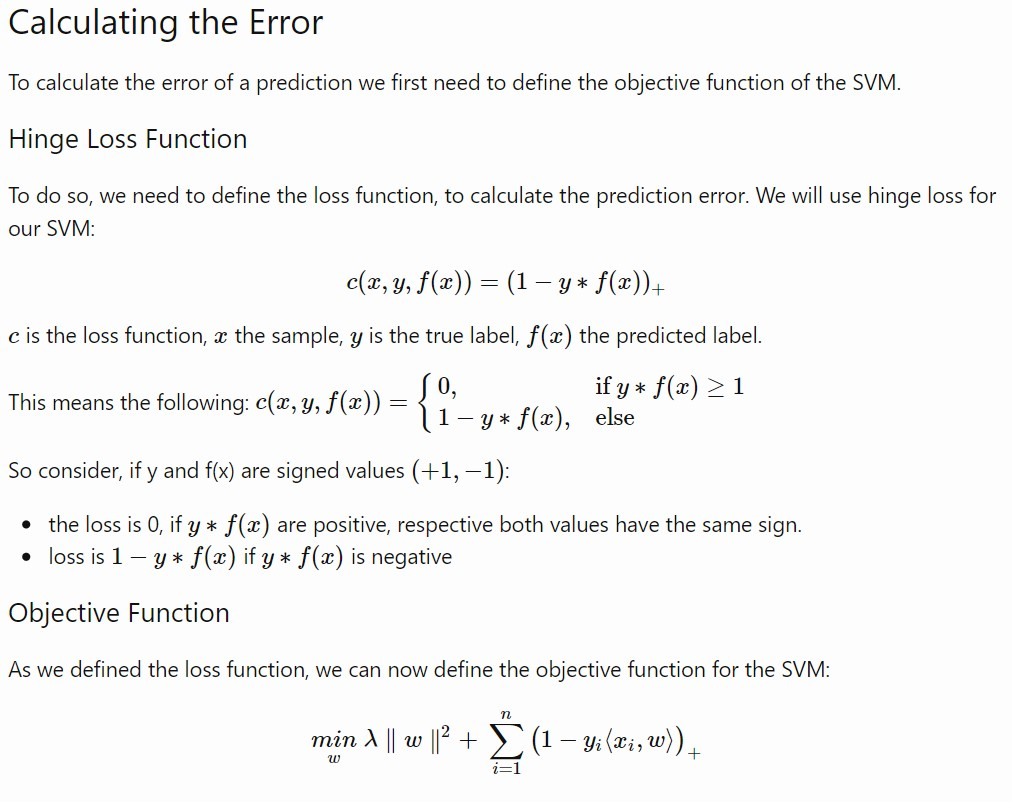


The first term is a regularizer, the heart of the SVM, the second term the loss. The regularizer balances between margin maximization and loss.

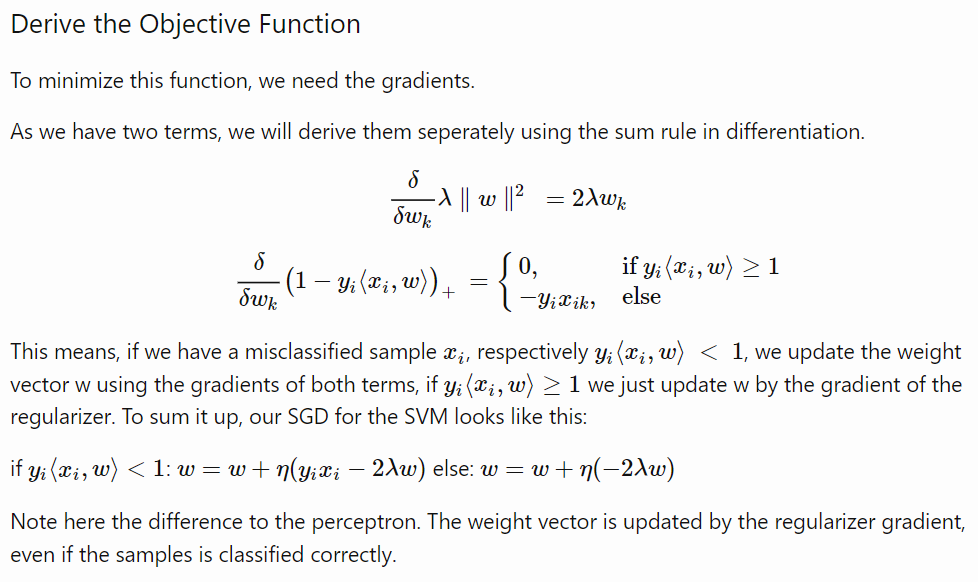

In [ ]:
class SVM_classifier():
    
    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
        """Initialize the classifier with the given parameters.

        Args:
            learning_rate (_type_): _description_
            no_of_iterations (_type_): _description_
            lambda_parameter (_type_): _description_
        """
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter

    def fit(self, X, Y):
        """Fit the classifier to the given dataset.

        Args:
            X (_type_): _description_
            Y (_type_): _description_
        """
        # m  --> number of Data points --> number of rows
        # n  --> number of input features --> number of columns
        self.m, self.n = X.shape
        
        # initiating the weight value and bias value
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        # implementing Gradient Descent algorithm for Optimization
        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        """Update the weights and bias using the gradient descent algorithm."""
        # label encoding
        y_label = np.where(self.Y <= 0, -1, 1)

        # gradients [dw  db]
        for index, x_i in enumerate(self.X):
            condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1
            if (condition == True):
                dw = 2 * self.lambda_parameter * self.w
                db = 0
            else:
                dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
                db = y_label[index]
            self.w = self.w - self.learning_rate * dw
            self.b = self.b - self.learning_rate * db

    def predict(self, X):
        """Predict the label for the given input value.

        Args:
            X (_type_): _description_

        Returns:
            _type_: _description_
        """
        print('w = ', self.w)
        print('b = ', self.b)
        output = np.dot(X, self.w) - self.b
        predicted_labels = np.sign(output)
        y_hat = np.where(predicted_labels <= -1, 0, 1)
        for d, sample in enumerate(features):
        # Plot the negative samples
            if d < 2:
                plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
            # Plot the positive samples
            else:
                plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

        # Add our test samples

        plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
        plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

        # Print the hyperplane calculated 
        x2=[self.w[0],self.w[1],-self.w[1],self.w[0]]
        x3=[self.w[0],self.w[1],self.w[1],-self.w[0]]

        x2x3 =np.array([x2,x3])
        X,Y,U,V = zip(*x2x3)
        ax = plt.gca()
        ax.quiver(X,Y,U,V,scale=1, color='blue')
        return y_hat

## Separating the features and labels

In [ ]:
features = diabetes_data.drop(columns='Outcome', axis=1)
target = diabetes_data['Outcome']
print(features)
print(target)

## Standardizing the data

In [ ]:
# Call StandardScaler to standardize the features
scaler = StandardScaler()
print(scaler.fit(features))
StandardScaler(copy=True, with_mean=True, with_std=True)
standardized_data = scaler.transform(features)
print(standardized_data)
print(standardized_data.shape)


In [ ]:
features = standardized_data
target = diabetes_data['Outcome']
print(features)
print(target)

## Train test split

In [ ]:
# splitting the dataset into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=2)
print(features.shape, X_train.shape, X_test.shape)

## Training model

In [ ]:
classifier = SVM_classifier(
    learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01)
classifier.fit(X_train, Y_train)

## Evaluating 

### On training dataset

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score on training data = ', training_data_accuracy)

## On the test set

In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score on test data = ', test_data_accuracy)

## Predict label for a test data

In [ ]:
# Predicting the labels for the test data 
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

# change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the arra
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# standardizing the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The Person is diabetic')

In [ ]:
def svm_sgd_plot(X, Y):

    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 100000
    errors = []


    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
            if (Y[i]*np.dot(X[i], w)) < 1:
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error = 1
            else:
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)

    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()

svm_sgd_plot(features, target)